# Predicting Customer Churn

## Identifying Customers that are Susceptible to Churn in order to Enhance Retention Strategies and Boost Business Growth

### Import packages

In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

### Data Collection

Load the dataset into Python with Pandas.

In [2]:
df = pd.read_excel('Dataset.xlsx')

### Data Exploration

In Data Exploration, we aim to understand the data, and what it contains, this include:
- understanding the data structure, statistics, and quality of the dataset,
- visualize the data to get insights,
- check for missing values

See a subset of the dataset - the first few rows.

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


A quick overview of the dataset.

- `CustomerID`: A unique identifier for each customer.
- `Name`: The name of the customer.
- `Age`: The age of the customer.
- `Gender`: The gender of the customer.
- `Location`: The location or city where the customer is based.
- `Email`: The email address of the customer.
- `Phone`: The phone number of the customer.
- `Address`: The postal address of the customer.
- `Segment`: The customer segment or category to which the customer belongs (e.g., Segment A, Segment B, Segment C).
- `PurchaseHistory`: A list of dictionaries representing the customer's purchase history. Each dictionary includes details about products purchased, purchase frequency, and purchase value.
    - `Product`: Product name.
    - `Frequency`: The number of times this product was purchased by the customer.
    - `Value`: Cost of  this product.
- `SubscriptionDetails`: A dictionary containing information about the customer's subscription plan, including the plan name, start date, and end date.
    - `Plan`: Name of the subscription plan.
    - `StartDate`: Start date of subscription plan.
    - `EndDate`: End date of subscription plan.
- `ServiceInteractions`: A list of dictionaries representing the customer's interactions with customer service. Each dictionary includes the type of interaction (e.g., Call, Email, Chat) and the date of the interaction.
    - `Type`: Type of service, it could be Call, Email or Chat.
    - `Date`: Date of the service interaction.
- `PaymentHistory`: A list of dictionaries representing the customer's payment history. Each dictionary includes the payment method (e.g., Credit Card, PayPal) and the number of late payments.
    - `Method`: Payment method, can either be Credit Card, PayPal or Bank Transfer.
    - `LatePayments`: Number of late payments.
- `WebsiteUsage`: A dictionary containing metrics related to the customer's usage of a website or app, including the number of page views and time spent (in minutes).
- `PageViews`: The number of website page views from the customer.
- `TimeSpent`: Time spent on the website by a customer in minutes.
- `ClickstreamData`: A list of dictionaries representing the customer's clickstream data, including actions such as clicks, searches, and adding items to the cart. Each dictionary includes the action type, the page where the action occurred, and a timestamp.
    - `Action`: Clickstream action of the user, could be Click, Search or Add to Cart.
    - `Page`: The website page in which the user performed this action.
    - `Timestamp`: Timestamp of the clickstream action.
- `EngagementMetrics`: A dictionary containing engagement metrics, such as the number of logins and the frequency of engagement (e.g., Daily, Weekly, Monthly).
    - `Logins`: The number of logins the user made.
    - `Frequency`: How often a customer logs in to the platform. Could be Daily, Weekly or Monthly.
- `Feedback`: Feedback provided by the customer, including a rating (e.g., 1 to 5) and a comment.
    - `Rating`: A value between 1 and 5 that indicates the customer’s feedback rating.
    - `Comment`: The comment left by the customer for the feedback.
- `MarketingCommunication`: A list of dictionaries representing the customer's history of marketing communication, including dates when emails were sent, opened, and clicked.
    - `EmailSent`: Date when email was sent.
    - `EmailOpened`: Date when email was opened.
    - `EmailClicked`: Date when email was clicked.
- `NPS`: The Net Promoter Score (NPS) of the customer, which measures customer loyalty and satisfaction on a scale of 0 to 10.
- `ChurnLabel`: A binary label indicating whether the customer has churned (1 for churn, 0 for no churn).
- `Timestamp`: The timestamp indicating when the data was recorded for the customer.

Confirm that there are no missing values in the dataset.

In [4]:
missing_values = df.isnull().sum()

missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Since there are no missing values, we'll check if there are duplicates.

In [5]:
df.duplicated().any()

False

Since there are no duplicates, we'll go ahead to get a basic statistical overview of the numerical columns in the dataset.

In [6]:
stats_overview = df.describe()

stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


The mean value of the `ChurnLabel` column is about 0.51, this indicates that we have a balanced tataset.

Next, we see how the target variable `ChurnLabel`, and some of the other variables are distributed.

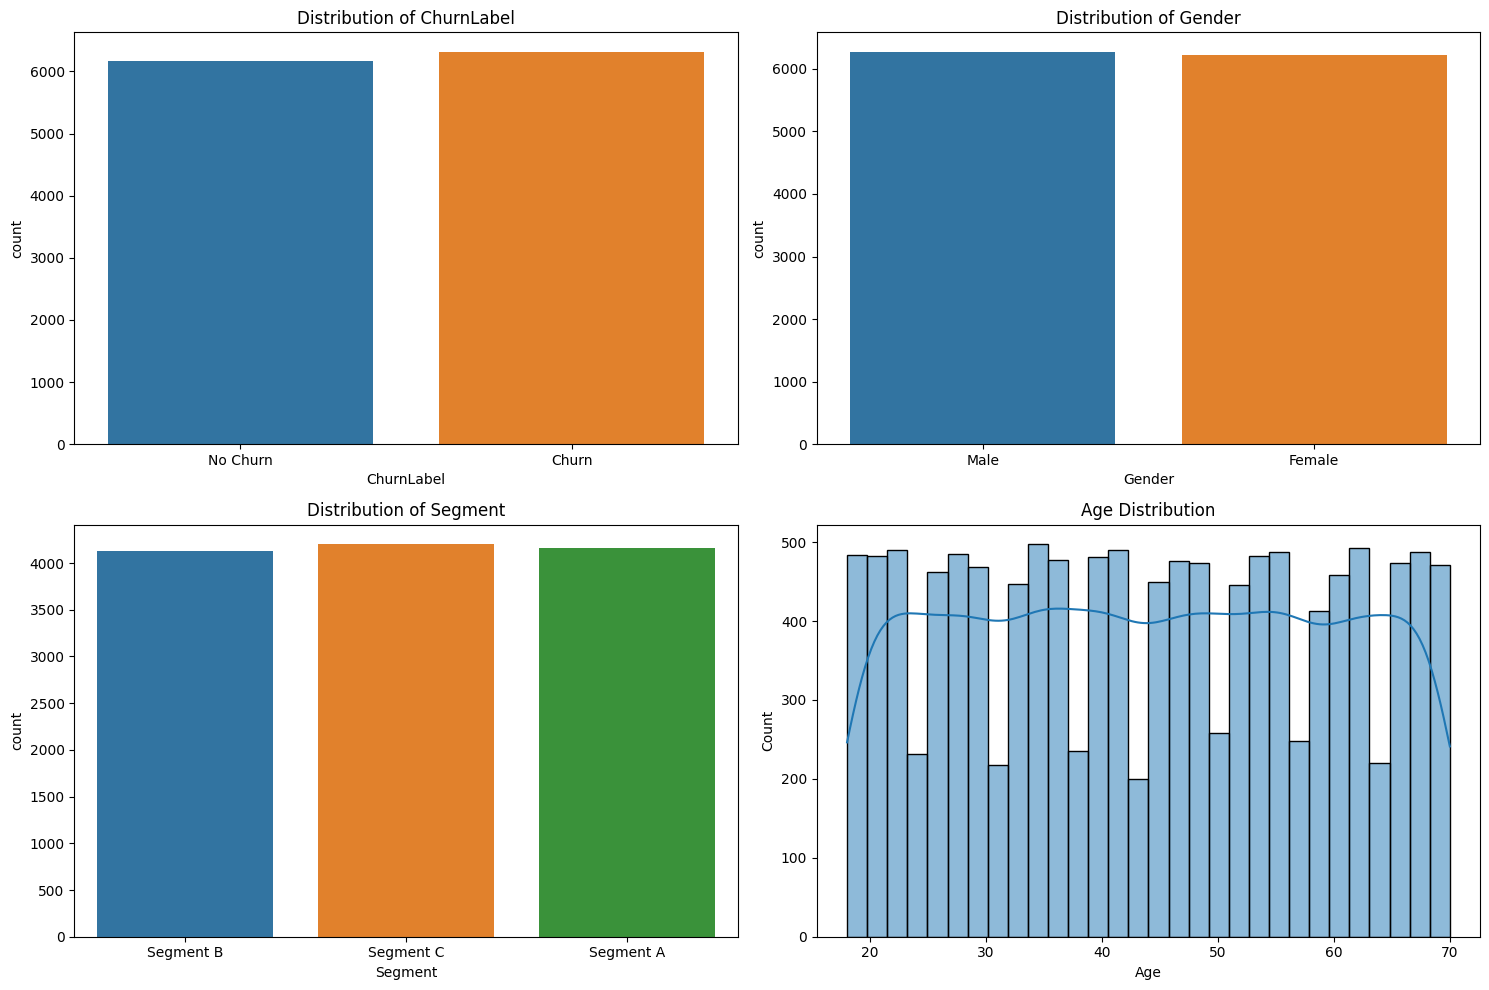

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# Plot distribution of Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# Plot distribution of Segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

# Age distribution
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

A few things to note from these visuals:
- the dataset is almost evenly distributed between the `ChurnLabel=1` (churned) and `ChurnLabel=0` (not churned).
- the number of `Male` and `Female` gendered customers are almost equal.
- the distribution of `Segment` variable is almost even across the three Segments (`Segment A`, `Segment B` and `Segment C`).
- the number of customers of any particular `Age` in the dataset, seems to flunctuate between `200` and `500`.

Correlation Analysis: Here, we get to see which numerical features in the dataset correlates with `ChurnLabel`. A good understanding of the correlation in the dataset, means that one will understand which paramters might have a strong influence on the `ChurnLabel`.

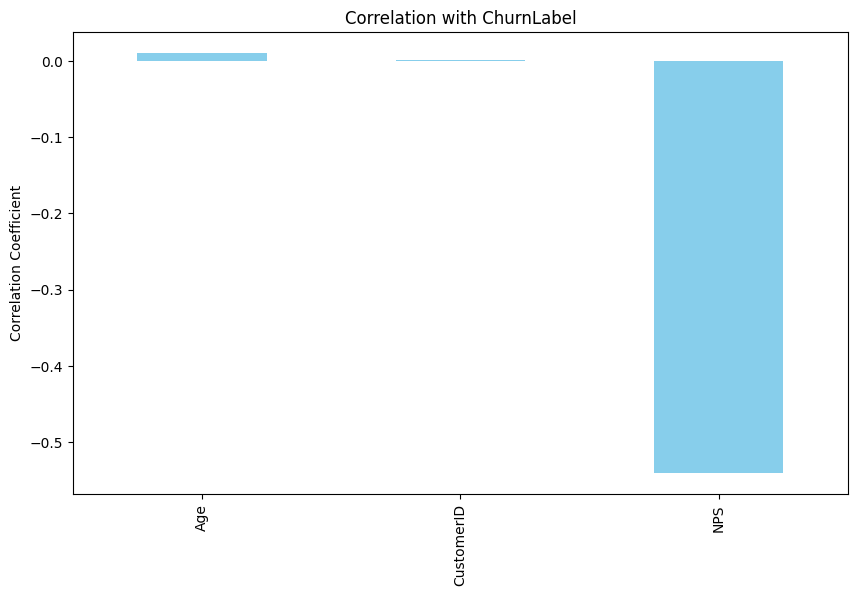

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [8]:
# Calculate correlation with ChurnLabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

As seen above:
- there is some moderate inverse correlation (-0.5407) between the `NPS` variable and the `ChurnLabel` variable. This `NPS` parameter should have some influence over the `ChurnLabel`.
- the `Age` column shows almost no correlation with the `ChurnLabel` variable.

We're going to explore the nested columns next, and see how they are nested.

In [9]:
# List out the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print("\n| {:<{w1}} | {:<{w2}} |".format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Only the `SubscriptionDetails`, `EngagementMetrics` and `Feedback` columns are simply nested as dictionaries only. The others are made up of arrays that contain varying number of dictionaries within them.

Temporal Analysis: Here, we will take a look at how the Churn rate changes over time, to see if there are any recurring patterns.

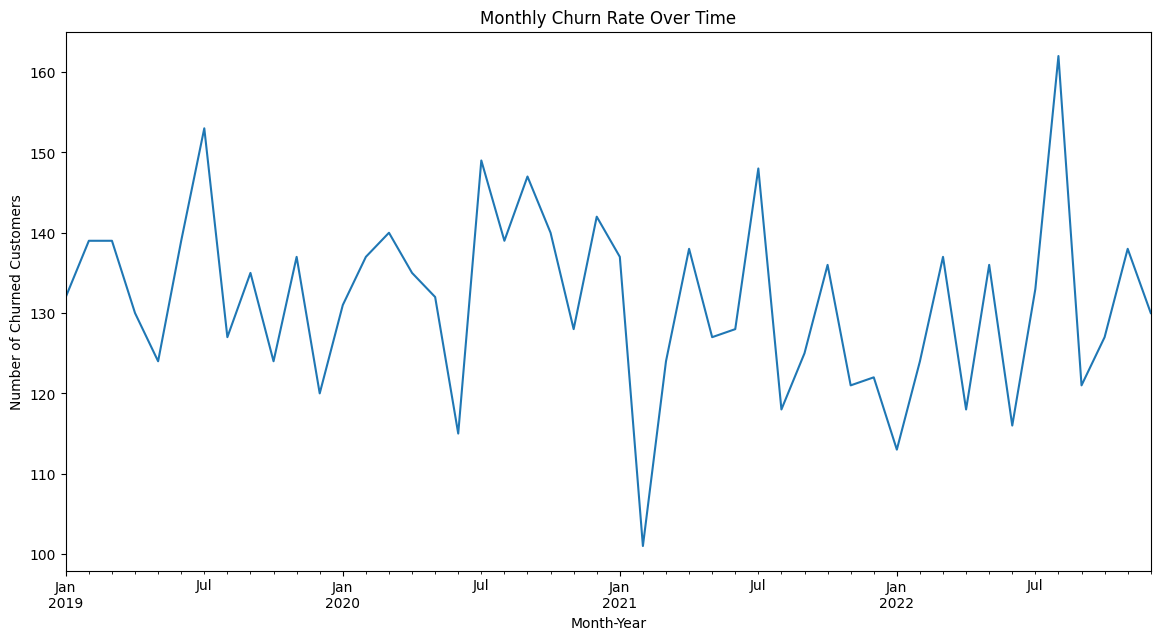

In [10]:
# Convert Timestamp to datetime format so that it can be grouped.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by MonthYear and calculate churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rates over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()


The only thing can be easily observed from this visual is that there are always fluncutations in the churn rate over time, but it doesn't seem to indicated any yearly fluncutuation patterns.

We'll also need to see if there are any patterns between the customer feedback `Ratings` and the `ChurnLabel`. This should give us a basic understanding of whether or not the customer ratings are related to whether or not a customer will churn.

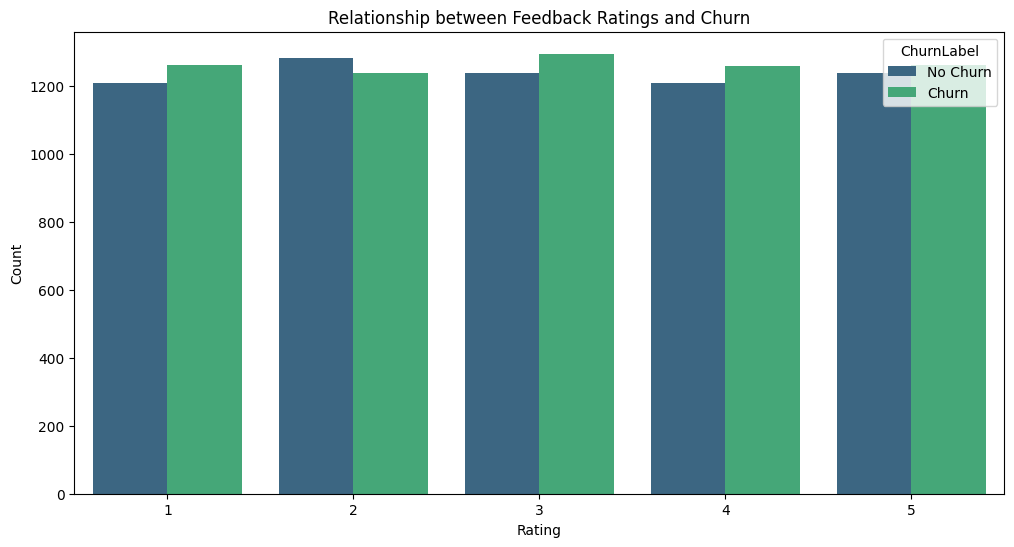

In [11]:
# Extracting rating from the Feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plotting the relationship between feedback ratings and churn
plt.figure(figsize=(12, 6))
sns.countplot(x='FeedbackRating', hue='ChurnLabel', data=df, palette="viridis")
plt.title('Relationship between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual, there doesn't seem to be any indication that the `Feedback` rating affects the `ChurnLabel`.

### Data Preprocessing & Feature Engineering

In this Data Preprocessing and Feature Engineering step, we aim to achieve a few things:
- create new features that may have predictive power.
- convert categorical variables to numeric variables, using encoding techniques,
- scale or normalize numeric variables if necessary,
- split the data into training and testing subsets.
- remove irrelevant features.

We begin by first converting values in nested columns to actual list or dictionaries. These nested columns are usually brought into pandas as strings. This datatype conversion will be done with `literal_eval` function in Python.

In [12]:
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More features will be extracted from the dataset.

In [13]:
# From: PurchaseHistory
# Extract:
#   - PurchasedProducts: The names of all the products purchased by a user
#   - PurchaseFrequency: The total number of times a user has made a purchase
#   - PurchaseValue: The total cost of all the user's purchases
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# From: SubscriptionDetails
# Extract:
#   - SubscriptionPlan: The plan name the user suscribed to
#   - SubscriptionStartDate: The date the user started suscribing to the service
#   - SubscriptionEndDate: The date the user stopped suscribing to the service
#   - SubscriptionDuration: The duration through which the user suscribed to the service
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# From: WebsiteUsage
# Extract:
#   - WebsitePageViews: The number of times the user viewed the company's website
#   - WebsiteTimeSpent: The total time the user spent on the company's website
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# From: EngagementMetrics
# Extract:
#   - EngagementMetricsLogins: The number of times the user logged in to the company's website
#   - EngagementMetricsFrequency: How often a user logs in to the company's website
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# From: Feedback
# Extract:
#   - FeedbackRating: The feedback rating from the user
#   - FeedbackComment: The feedback comment from the user
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# From: MarketingCommunication
# Extract:
#   - MarketingCommunicationNoOfEmails: The number of emails sent by the marketing team to the user
#   - MarketingCommunicationOpenClickDiff: The duration between when the user opened the email, to when they actually clicked the links in the email
#   - MarketingCommunicationSentOpenDiff: The duration between when the user was sent the email, to when they actually opened the email
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
         - pd.to_datetime(i['Email_Opened'])).days for i in x
        ]))
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
         - pd.to_datetime(i['Email_Sent'])).days for i in x
        ]))

For some existing features, we may need to create new features from the them in a different format. We're going to try to create new features from `ServiceInteractions`, `PaymentHistory` and `ClickstreamData`, from the individual parameters within them.

Before we do this, we'll first confirm the kind of unique values in the columns, in order to understand how to create more features.

In [14]:
# Get all unique ServiceInteractions 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)

All unique Service Interaction Types: ['Call', 'Email', 'Chat']
All unique Payment History Methods: ['Bank Transfer', 'PayPal', 'Credit Card']
All unique Clickstream Data Actions: ['Click', 'Search', 'Add to Cart']


From each of these unique values in `ServiceInteractions`, `PaymentHistory` and `ClickstreamData`, we will create new features from them.

In [15]:
# From: ServiceInteractions
# Extract: The number of service interactions made to customer service through Email, Call, and Chat.
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# From: PaymentHistory
# Extract:
#   - PaymentHistoryNoOfLatePayments: The total number of late payments made by the user
#   - PaymentHistoryAvgNoOfLatePayments: The average number of late payments made by the user
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum([i['Late_Payments'] for i in x]))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# From: ClickstreamData
# Extract: The number of ClickstreamData Actions performed by the user on the website, these include 'Add to Cart', 'Search' and 'Click'.
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

Let's now see a subset of these changes we have made.

In [16]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Search,ClickStreamData_Add to Cart
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,1,2,40,13.333333,4,12,8
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,5,10,4,10,3.333333,9,7,8
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,3,7,2
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,17,18,24,79,26.333333,16,16,15
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,4,5,1,2,0.666667,9,4,17


Let's see all of the columns we now have.

In [17]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Cl

Some of the columns will be left out from the next step. This is because they do not carry any significant information that can help us in determing whether or not a customer will churn. Examples of the features that will be dropped include `CustomerID`, `Name`, `Location`, etc.

In [18]:
df_ = df[['Age',
          'Gender',
          'Segment',
          'NPS',
          'ChurnLabel',
          'PurchaseFrequency',
          'PurchaseValue',
          'SubscriptionPlan',
          'WebsitePageViews',
          'WebsiteTimeSpent',
          'EngagementMetricsLogins',
          'EngagementMetricsFrequency',
          'FeedbackRating',
          'MarketingCommunicationNoOfEmails',
          'MarketingCommunicationOpenClickDiff',
          'MarketingCommunicationSentOpenDiff',
          'ServiceInteractions_Call',
          'ServiceInteractions_Email',
          'ServiceInteractions_Chat',
          'PaymentHistoryNoOfLatePayments',
          'PaymentHistoryAvgNoOfLatePayments',
          'ClickStreamData_Click',
          'ClickStreamData_Add to Cart',
          'ClickStreamData_Search',
          'SubscriptionDuration']]

df_.head()

,Age,Gender,Segment,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,...,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,Segment B,3,1,38,3994.72,Express,49,15,...,818.0,1,1,2,40,13.333333,4,8,12,871
1,66,Female,Segment C,6,0,4,2844.35,Pro,100,9,...,110.0,5,10,4,10,3.333333,9,8,7,290
2,36,Female,Segment B,3,0,14,1866.52,Essential,1,97,...,333.0,1,1,1,8,2.666667,3,2,7,319
3,62,Female,Segment C,1,1,28,1378.64,Smart,25,31,...,159.0,17,18,24,79,26.333333,16,15,16,803
4,68,Female,Segment C,3,0,39,2425.05,Basic,77,51,...,193.0,4,5,1,2,0.666667,9,17,4,580


See the values in the first row of each column, to know which are numerical, and which are strings.

In [19]:
df_.loc[0].T

Age                                           31
Gender                                      Male
Segment                                Segment B
NPS                                            3
ChurnLabel                                     1
PurchaseFrequency                             38
PurchaseValue                            3994.72
SubscriptionPlan                         Express
WebsitePageViews                              49
WebsiteTimeSpent                              15
EngagementMetricsLogins                       19
EngagementMetricsFrequency                Weekly
FeedbackRating                                 1
MarketingCommunicationNoOfEmails               8
MarketingCommunicationOpenClickDiff        319.0
MarketingCommunicationSentOpenDiff         818.0
ServiceInteractions_Call                       1
ServiceInteractions_Email                      1
ServiceInteractions_Chat                       2
PaymentHistoryNoOfLatePayments                40
PaymentHistoryAvgNoO

As seen above, the columns `Gender`, `Segment`, `SubscriptionPlan`, and `EngagementMetricsFrequency` all have string type values.

We'll then need to see if the number of distinct values in these columns are small. This will help us know if we should remove these columns or encode them. Usually:
- if the number of distinct values is small with respect to the number of columns, the column is encoded,
- if the number of distinct values is large with respect to the number of columns, the column is removed.

In [20]:
df_t = df_[['Gender', 'Segment', 'SubscriptionPlan', 'EngagementMetricsFrequency']]

print(f'Total dataset length: {len(df_)}\n')

df_t.nunique()

Total dataset length: 12483



Gender                         2
Segment                        3
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

As seen, each of these four columns have very small number of unique values as compared to the length of the DataFrame. So, they will all be encoded.

Encode the strings in this `df_` with numbers or integers.

In [21]:
df_['SubscriptionPlan'].unique()

array(['Express', 'Pro', 'Essential', 'Smart', 'Basic', 'Select', 'Prime',
       'Silver', 'Gold', 'Plus', 'Elite', 'Trial', 'Flex', 'Student',
       'Family', 'Bronze', 'VIP', 'Deluxe', 'Unlimited', 'Eco'],
      dtype=object)

In [22]:
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# Segment encoding
segment_map = {'Segment A': 0, 'Segment B': 1, 'Segment C': 2}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding
engagement_frequency_map = {'Weekly': 0,
                            'Daily': 1,
                            'Monthly': 2}

# Apply the encodings
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'Segment'] = df_.loc[:, 'Segment'].map(segment_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

See the values in the first row of each column, to see if there are still strings.

In [23]:
df_.loc[0].T

Age                                           31
Gender                                         0
Segment                                        1
NPS                                            3
ChurnLabel                                     1
PurchaseFrequency                             38
PurchaseValue                            3994.72
SubscriptionPlan                               0
WebsitePageViews                              49
WebsiteTimeSpent                              15
EngagementMetricsLogins                       19
EngagementMetricsFrequency                     0
FeedbackRating                                 1
MarketingCommunicationNoOfEmails               8
MarketingCommunicationOpenClickDiff        319.0
MarketingCommunicationSentOpenDiff         818.0
ServiceInteractions_Call                       1
ServiceInteractions_Email                      1
ServiceInteractions_Chat                       2
PaymentHistoryNoOfLatePayments                40
PaymentHistoryAvgNoO

We'll be plotting the correlation heatmap next to see how the features correlate with each other.

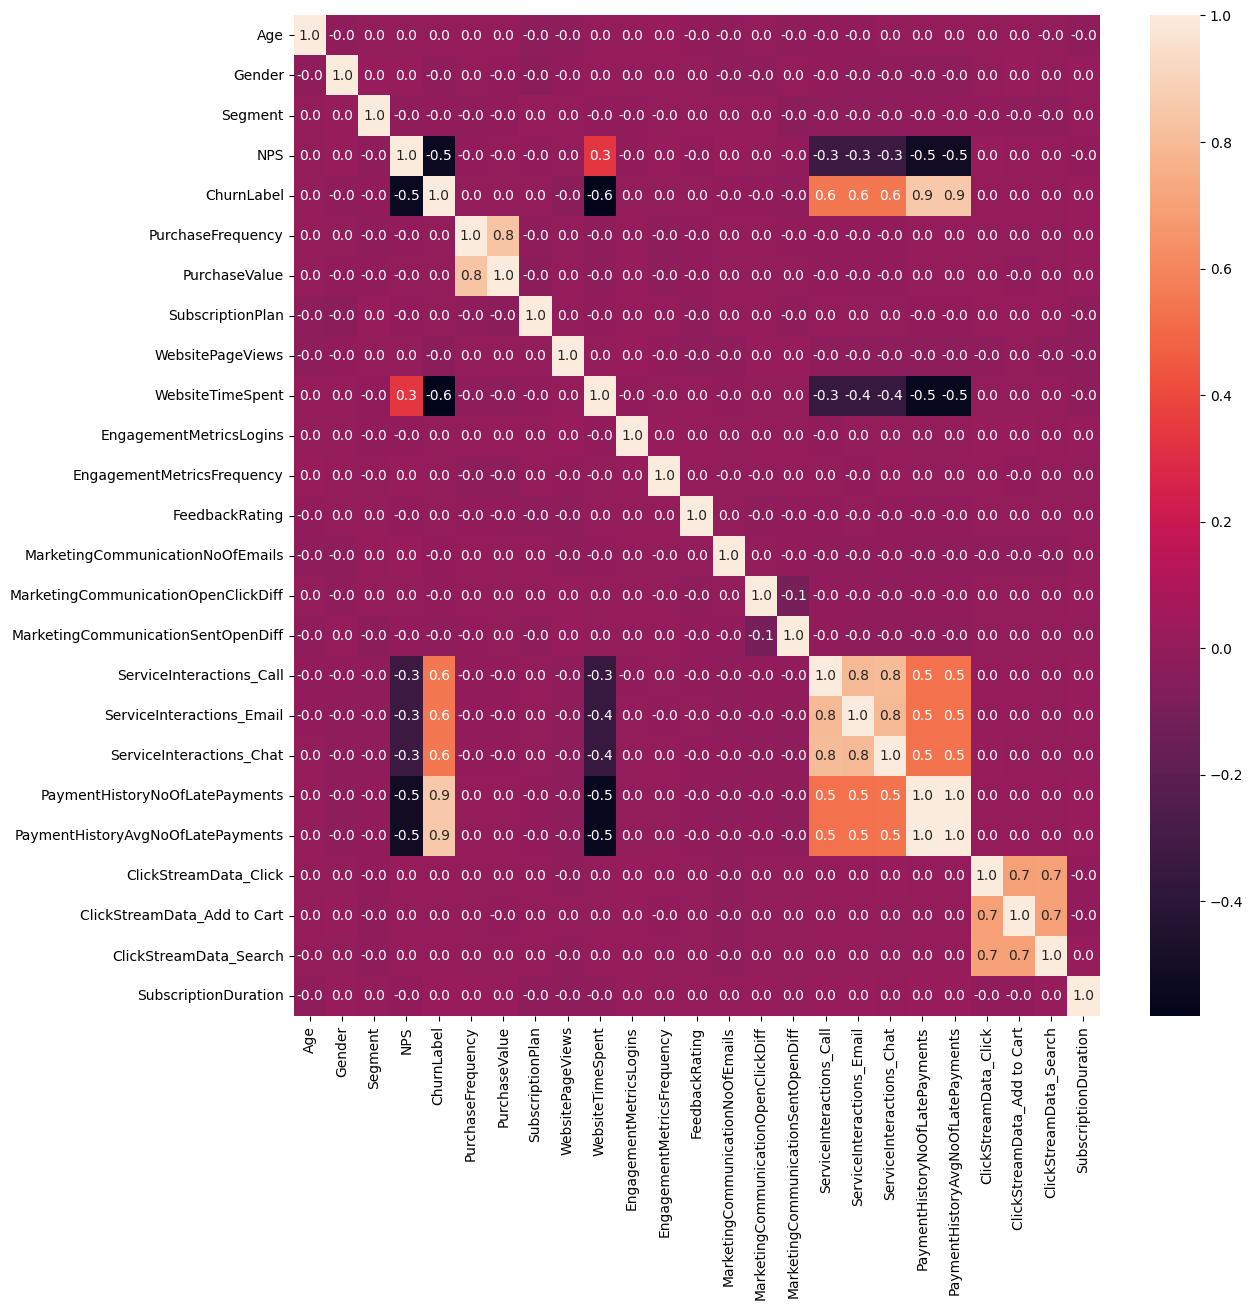

In [24]:
df_corr = df_.corr()

fig, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)

plt.show()

As can be seen, if we focus on the `ChurnLabel`, we see that:
- `NPS` exhibits some moderate negative correlation (-0.5) with the `ChurnLabel`,
- `WebsiteTimeSpent` exhibits some moderate negative correlation (-0.6) with the `ChurnLabel`,
- `ServiceInteractions_Call` exhibits some moderate postive correlation (0.6) with the `ChurnLabel`,
- `ServiceInteractions_Email` exhibits some moderate positive correlation (0.6) with the `ChurnLabel`,
- `ServiceInteractions_Chat` exhibits some moderate positive correlation (0.6) with the `ChurnLabel`,
- `PaymentHistoryNoOfLatePayments` exhibits some high positive correlation (0.9) with the `ChurnLabel`,
- `PaymentHistoryAvgNoOfLatePayments` exhibits some high positive correlation (0.9) with the `ChurnLabel`,

Sort the data into features and target variables. Also split the dataset into train, test and validation sets. We will be splitting into train, test and validation sets because we will use the train set for training, use the validation set to evaluating different models while experimenting, and then we will use the test set for a final evaluation. The test set is usually larger than the validation set and so can properly account for most issues that may not be encountered in the test set.

In [25]:
# Get X and y ('ChurnLabel')
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

# Split into train, validation and test set
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

The variables `X_train`, `X_val` and `X_test` will be rescaled with `sklearn`'s `StandardScaler`.

In [26]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Modelling

The `ChurnLabel` will be modelled two models, to see the best performing one. The models are:
- LogisticRegression,
- DecisionTreeClassifier.

A function for evaluating each of the models on any of the subset is created first. The evaluation will be based on four metrics:
- Accuracy score,
- Precision score,
- Recall score,
- F1 score.

In [27]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f"{subset} Accuracy Score: {accuracy_score(y_pred, y)}")
    print(f"{subset} Precision Score: {precision_score(y_pred, y)}")
    print(f"{subset} Recall Score: {recall_score(y_pred, y)}")
    print(f"{subset} F1 Score: {f1_score(y_pred, y)}\n")

#### Modelling with Logistic Regression

Here, we will first build and fit the Logistic Regression model on the train dataset (`X_train`, `y_train`), and then evaulate on both this train (`X_train`, `y_train`) and validation dataset (`X_val`, `y_val`).

In [28]:
# Build and fit model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate on train and validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9708592028840376
Train Precision Score: 0.9657412876550502
Train Recall Score: 0.9767025089605734
Train F1 Score: 0.9711909711909711

Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967



#### Modelling with Decision Trees

Here, we will first build and fit the Cecision Tree model on the train dataset (`X_train`, `y_train`), and then evaulate on both this train (`X_train`, `y_train`) and validation dataset (`X_val`, `y_val`).

In [29]:
# Build and fit model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Evaluate on train and validation subsets
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335302

Validation Accuracy Score: 0.968
Validation Precision Score: 0.9724517906336089
Validation Recall Score: 0.9618528610354223
Validation F1 Score: 0.9671232876712329



On the validation dataset:
- for Accuracy score: the Decision Tree model performed slightly better,
- for Precision score: the Decision Tree model performed slightly better,
- for Recall score: the Logistic Regression model performed slightly better,
- for F1 score: the Decision Tree model performed slightly better.

### Evaluation on the Test Set

The final evaluation will be done on the reserved test set (`X_test`, `y_test`)

In [30]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test')
evaluate(X_test, y_test, dt, 'DecisionTree Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165897

DecisionTree Test Accuracy Score: 0.9730967372638809
DecisionTree Test Precision Score: 0.9724770642201835
DecisionTree Test Recall Score: 0.9735935706084959
DecisionTree Test F1 Score: 0.9730349971313826



On this test dataset:
- for Accuracy score: the Decision Tree model performed slightly better,
- for Precision score: the Decision Tree model performed slightly better,
- for Recall score: the Decision Tree model performed slightly better,
- for F1 score: the Decision Tree model performed slightly better.

This is consistent with the evaluation results of the validation subset.

Finally, a confusin matrix will plotted on the test dataset to identify how many customers were misclassified by both models.

Confusion matrix for Logistic Regression.

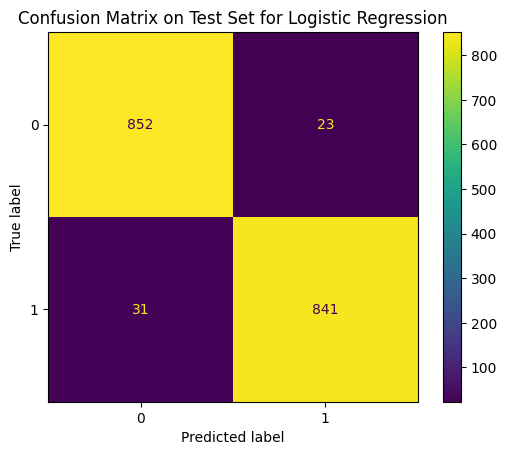

In [31]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

Confusion matrix for Decision Tree.

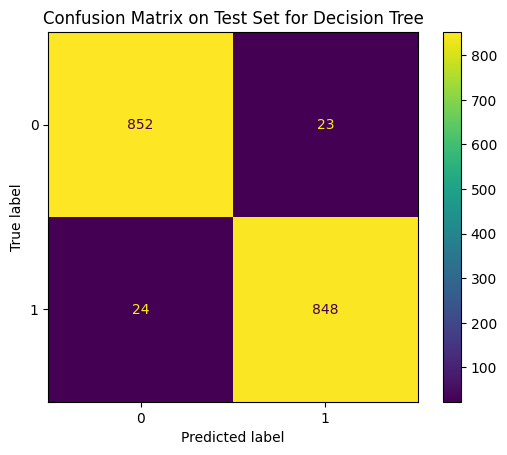

In [32]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

From the decision matrix of both models,
- They both perform well at predicting customers that did not churn,
- Decision Tree performs better at predicting customers that churned.

### Conclusion

The parameters that are most important in determining whether or not a customer will churn are:
- the number of Service Interactions the customer has had with customer service through Call, Email and Chat,
- the number of times the customer has made Late Payments,
- the time spent on the company's website,
- and the Net Promoter Score (NPS) of the customer, which measures customer loyalty and satisfaction.

#### Author Wilson Gitonga
www.wilsongitonga.com
-- 